# Implementação MLP para dataset

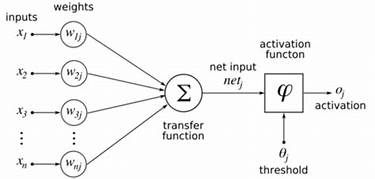

In [225]:
from IPython.display import Image
Image("/home/jovyan/MLPxRBF/perceptron.png")

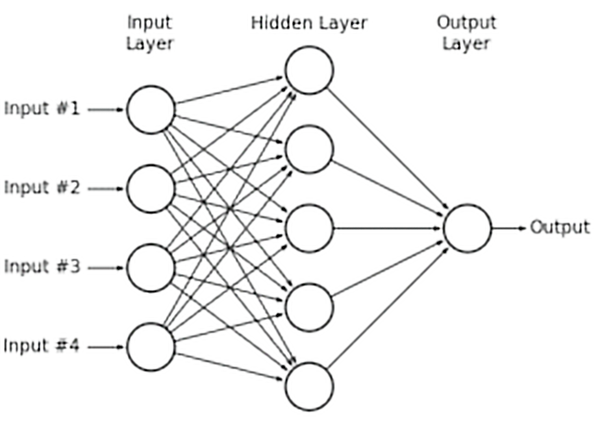

In [224]:
from IPython.display import Image
Image("/home/jovyan/MLPxRBF/mlp.png")

In [218]:
# Função de ativação Logit

def f_net(activation):
     return 1.0 / (1.0 + np.exp(-activation))

In [219]:
# Derivada da Logit

def f_prime_net(f_net):
    return f_net*(1-f_net)

In [220]:
# Etapa Foward

def f_Forward(Xp,w_hidden_layer,w_output_layer,net_hidden,fnet_hidden,net_out, fnet_out,n_hidden):
    # Camada oculta
    net_hidden  = np.sum(w_hidden_layer*Xp,axis=1)
    fnet_hidden = f_net(net_hidden)
    f_prime_hp = f_prime_net(fnet_hidden)
    # Camada de saída
    net_out = np.sum(np.r_[fnet_hidden, 1]*w_output_layer,axis=1)
    fnet_out =  f_net(net_out)
    f_prime_op = f_prime_net(fnet_out)
    
    return net_hidden, fnet_hidden, net_out, fnet_out, f_prime_op, f_prime_hp



In [221]:
# Backpropagation

def mlp_backpropagation(X,Y,n_inputs,n_hidden,n_outputs ,eta ,Erro_Global):
    # Vetor de entrada com acréscimo de coluna para bias
    Xp = np.concatenate((X, np.reshape(np.ones(len(X)),(len(X),1))), axis=1)

    # Inicialização dos pesos de forma aleatória
    w_hidden_layer = np.array([[random.uniform(-0.5,0.5) for i in range(n_inputs+1)] for i in range(n_hidden)])
    w_output_layer = np.array([[random.uniform(-0.5,0.5) for i in range(n_hidden+1)]     for i in range(n_outputs)])

    ## Hidden Layer
    net_hidden  = np.zeros(w_hidden_layer.shape)
    fnet_hidden = np.zeros(w_hidden_layer.shape)

    ## Output Layer
    net_out  = np.zeros(n_outputs)
    fnet_out = np.zeros(n_outputs)
    # Vetor de saída da hidden com acréscimo de coluna para bias

    counter = 0
    squaredError = Erro_Global * 2

    while squaredError > Erro_Global :
        squaredError = 0
        for i in range(len(X)):
            net_hidden, fnet_hidden, net_out, fnet_out, f_prime_op, f_prime_hp = f_Forward(Xp[i],w_hidden_layer,w_output_layer,net_hidden,fnet_hidden,net_out, fnet_out,n_hidden)

          
            error = Y[i] - fnet_out
            squaredError = squaredError + np.sum(error**2)

            #Cálculo dos deltas
            delta_op  = error * f_prime_op        
            w_o_kj    = w_output_layer[:,0:w_output_layer.shape[1]-1]
            delta_h_p = f_prime_hp*np.dot(w_o_kj.T,delta_op)

            #Treinamento
            w_output_layer = w_output_layer + eta * np.dot(  np.reshape(delta_op,(len(w_output_layer),1)), np.reshape(np.r_[fnet_hidden,1],(1,n_hidden+1))) 
            w_hidden_layer = w_hidden_layer + eta * np.dot(np.reshape(delta_h_p,(n_hidden,1)),np.reshape(Xp[i],(1,len(X[0])+1)))

        squaredError = squaredError / len(X)
        print(squaredError)
        counter = counter + 1
    
    return  squaredError , w_output_layer, w_hidden_layer, fnet_out

In [234]:
# Predição de novos dados

def f_predict(Xp,w_hidden_layer,w_output_layer):

    return  f_net(np.sum(np.r_[f_net(np.sum(w_hidden_layer*Xp.T,axis=1)), 1]*w_output_layer,axis=1))

     
    


In [229]:
import numpy as np
from math import exp
import random
import pandas as pd
#tratamentos de dataframes
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

random.seed(123)

# Importação do conjunto de dados Wine sem cabeçalho
df = pd.read_csv("/home/jovyan/MLPxRBF/wine.csv",delimiter=',',header=None)

# Nomeação das colunas
dict_colnames = {
0: 'type',
1: 'alcohol',
2: 'malic_acid',
3: 'ash',
4: 'alcalinity_ash',
5: 'magnesium',
6: 'total_phenols',
7: 'flavanoids',
8: 'nonflavanoid_phenols',
9: 'proanthocyanins',
10: 'color_intensity',
11: 'hue',
12: 'OD280_OD315_diluted_wines',
13: 'proline'
   }
    
df = df.rename(columns= dict_colnames)

# Criação do vetor de base canônica
df['p1'] = np.where(df['type']==1, 1, 0)
df['p2'] = np.where(df['type']==2, 1, 0)
df['p3'] = np.where(df['type']==3, 1, 0)

# Separação entre dados de treino e teste
lista = ['type','p1','p2','p3']
lista2 = ['p1','p2','p3']

x_train, x_test, y_train, y_test = train_test_split(df.drop(lista, axis = 1), 
                                                    df[lista2], 
                                                    test_size = 0.3, 
                                                    random_state = random.seed(123))

# Normalização dos dados
x_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)


# Matriz para treinar a rede
X = x_train_norm.copy()
Y = np.array(y_train.copy())

## Dimensões da Rede
n_inputs = len(X[0])
n_outputs = len(Y[0])
n_hidden = 3


Erro , w_output_layer, w_hidden_layer, fnet_out = mlp_backpropagation(X,Y,n_inputs,n_hidden,n_outputs ,eta = 0.01,Erro_Global=0.001)


0.7669360200767418
0.7359534809990597
0.7111247862702268
0.6911383927282609
0.674844110933553
0.6613083692884868
0.6498047148551984
0.639780862882486
0.6308223039051964
0.6226202590318972
0.6149459782130676
0.6076310376009139
0.6005525630221249
0.5936222408236808
0.586778140865628
0.579978587983601
0.5731975112824756
0.566420856892199
0.5596437694225104
0.5528683360814604
0.5461017518151671
0.539354809573937
0.5326406514618829
0.5259737376408308
0.5193690032319729
0.5128411813168364
0.5064042742603391
0.50007115736256
0.49385329935666544
0.4877605842724177
0.481801219180191
0.4759817126045545
0.4703069090668546
0.4647800662820386
0.4594029629226489
0.45417602646313554
0.4490984723136067
0.4441684471380817
0.43938317084366857
0.4347390731645192
0.4302319220127473
0.42585694181362904
0.4216089208863385
0.41748230758764404
0.4134712954247989
0.40956989768907576
0.40577201238751204
0.40207147838081997
0.39846212369118056
0.39493780694315983
0.391492452859734
0.38812008266606707
0.384814840

0.0291881104108989
0.029087987746628782
0.028988461757154336
0.028889527341202727
0.028791179454935863
0.028693413111149212
0.02859622337848349
0.028499605380649242
0.02840355429566428
0.028308065355103034
0.028213133843358454
0.02811875509691581
0.028024924503638148
0.027931637502063174
0.027838889580711772
0.02774667627740721
0.027654993178605664
0.027563835918737078
0.027473200179556883
0.027383081689507965
0.027293476223092535
0.027204379600254364
0.02711578768577056
0.02702769638865293
0.026940101661559027
0.026852999500212315
0.02676638594283133
0.026680257069568232
0.02659460900195551
0.02650943790236193
0.026424739973456686
0.02634051145768189
0.026256748636733267
0.02617344783104911
0.026090605399306716
0.026008217737926987
0.0259262812805865
0.025844792497737145
0.02576374789613296
0.025683144018364436
0.02560297744239988
0.025523244781133644
0.02544394268194126
0.02536506782624145
0.02528661692906483
0.025208586738628753
0.025130974035918966
0.02505377563427744
0.02497698837

0.011241822962638523
0.011222811520097013
0.011203856464655456
0.011184957559371931
0.011166114568587751
0.011147327257919093
0.011128595394248488
0.011109918745716435
0.011091297081713185
0.01107273017287038
0.011054217791052907
0.0110357597093508
0.01101735570207129
0.010999005544730635
0.010980709014046314
0.010962465887929138
0.010944275945475373
0.010926138966959178
0.010908054733824698
0.010890023028678635
0.010872043635282531
0.01085411633854536
0.010836240924516046
0.010818417180376091
0.01080064489443222
0.010782923856109064
0.010765253855942054
0.010747634685570143
0.010730066137728715
0.010712548006242583
0.010695080086018943
0.010677662173040397
0.010660294064358092
0.010642975558084904
0.010625706453388575
0.010608486550485022
0.010591315650631632
0.0105741935561206
0.010557120070272367
0.010540094997429073
0.01052311814294807
0.01050618931319543
0.010489308315539684
0.010472474958345255
0.010455689050966437
0.010438950403740885
0.010422258827983583
0.010405614135980611
0.

0.006489203009503229
0.006481992316318915
0.0064747958182223226
0.00646761347533239
0.0064604452479131
0.006453291096372839
0.006446150981263777
0.0064390248632811755
0.006431912703262799
0.006424814462188305
0.006417730101178536
0.006410659581494939
0.006403602864538978
0.006396559911851433
0.006389530685111864
0.0063825151461379395
0.006375513256884857
0.006368524979444749
0.0063615502760460295
0.0063545891090528465
0.006347641440964461
0.006340707234414665
0.0063337864521711374
0.006326879057134961
0.006319985012339944
0.006313104280952071
0.006306236826268944
0.006299382611719161
0.006292541600861799
0.006285713757385774
0.0062788990451093695
0.006272097427979579
0.006265308870071599
0.00625853333558826
0.006251770788859464
0.006245021194341622
0.006238284516617133
0.0062315607203938545
0.006224849770504454
0.0062181516319059936
0.006211466269679324
0.006204793649028568
0.00619813373528057
0.006191486493884421
0.006184851890410848
0.006178229890551743
0.0061716204601196065
0.006165

0.004464877109098217
0.004461166078938356
0.004457460538754421
0.004453760476921103
0.004450065881845111
0.00444637674196503
0.004442693045751209
0.004439014781705693
0.0044353419383620744
0.004431674504285436
0.004428012468072191
0.004424355818350003
0.004420704543777686
0.004417058633045093
0.00441341807487301
0.004409782858013056
0.004406152971247568
0.0044025284033895225
0.004398909143282411
0.00439529517980014
0.004391686501846942
0.004388083098357259
0.0043844849582956626
0.00438089207065672
0.00437730442446493
0.004373722008774591
0.004370144812669736
0.004366572825263983
0.004363006035700511
0.004359444433151886
0.004355888006820001
0.004352336745935979
0.00434879063976007
0.004345249677581558
0.004341713848718645
0.004338183142518384
0.004334657548356586
0.004331137055637683
0.00432762165379466
0.004324111332288981
0.00432060608061045
0.004317105888277169
0.0043136107448354015
0.004310120639859493
0.0043066355629517725
0.004303155503742474
0.0042996804518896595
0.0042962103970

0.003344036822635723
0.0033418207396036237
0.0033396072804029453
0.003337396440587421
0.0033351882157205996
0.0033329826013758284
0.003330779593136197
0.003328579186594549
0.003326381377353437
0.003324186161025078
0.0033219935332313728
0.0033198034896038215
0.0033176160257835565
0.0033154311374212738
0.0033132488201772256
0.003311069069721183
0.0033088918817324275
0.003306717251899711
0.003304545175921236
0.003302375649504627
0.003300208668366921
0.003298044228234509
0.0032958823248431346
0.003293722953937871
0.0032915661112730868
0.0032894117926124105
0.003287259993728734
0.0032851107104041877
0.0032829639384300596
0.003280819673606838
0.0032786779117441466
0.003276538648660749
0.0032744018801844988
0.003272267602152322
0.0032701358104102137
0.003268006500813164
0.003265879669225187
0.0032637553115192797
0.0032616334235773905
0.003259514001290376
0.0032573970405580348
0.0032552825372890214
0.0032531704874008663
0.003251060886819926
0.0032489537314813782
0.0032468490173291776
0.0032447

0.0026428718144807135
0.00264141780398645
0.002639965229269851
0.002638514088304255
0.0026370643790667113
0.002635616099538008
0.002634169247702617
0.0026327238215487388
0.0026312798190682544
0.002629837238256718
0.0026283960771133594
0.0026269563336410885
0.0026255180058464673
0.0026240810917397147
0.002622645589334676
0.002621211496648845
0.0026197788117033423
0.0026183475325229004
0.0026169176571358573
0.0026154891835741593
0.0026140621098733473
0.0026126364340725377
0.002611212154214429
0.0026097892683452925
0.002608367774514961
0.0026069476707768113
0.0026055289551877754
0.0026041116258083063
0.002602695680702401
0.0026012811179375794
0.0025998679355848714
0.0025984561317188007
0.0025970457044174043
0.0025956366517622047
0.0025942289718382024
0.00259282266273387
0.0025914177225411527
0.0025900141493554398
0.0025886119412756045
0.0025872110964039164
0.0025858116128461167
0.00258441348871137
0.0025830167221122424
0.0025816213111647334
0.0025802272539882324
0.002578834548705534
0.002

0.0021678444368949897
0.0021668265670175416
0.002165809559613944
0.0021647934136402552
0.00216377812805418
0.002162763701815052
0.002161750133883857
0.002160737423223194
0.0021597255687973178
0.0021587145695720848
0.002157704424514989
0.002156695132595143
0.002155686692783276
0.0021546791040517326
0.0021536723653744687
0.0021526664757270525
0.0021516614340866473
0.0021506572394320287
0.0021496538907435675
0.002148651387003225
0.0021476497271945613
0.0021466489103027305
0.0021456489353144626
0.0021446498012180726
0.0021436515070034716
0.0021426540516621254
0.0021416574341870916
0.0021406616535729903
0.002139666708816011
0.002138672598913911
0.0021376793228660026
0.002136686879673169
0.0021356952683378493
0.0021347044878640264
0.002133714537257237
0.0021327254155245686
0.0021317371216746485
0.002130749654717652
0.002129763013665287
0.002128777197530795
0.002127792205328959
0.002126808036076084
0.0021258246887900047
0.0021248421624900727
0.00212386045619718
0.0021228795689337133
0.0021218

0.0018326579361767103
0.0018319068962360757
0.0018311564148894243
0.0018304064915430798
0.0018296571256041867
0.0018289083164807023
0.001828160063581407
0.0018274123663158896
0.0018266652240945572
0.0018259186363286319
0.0018251726024301378
0.0018244271218119134
0.0018236821938876061
0.001822937818071665
0.001822193993779352
0.0018214507204267307
0.0018207079974306595
0.0018199658242088062
0.0018192242001796334
0.00181848312476241
0.0018177425973771926
0.001817002617444842
0.0018162631843870094
0.0018155242976261431
0.0018147859565854699
0.0018140481606890224
0.0018133109093616119
0.0018125742020288493
0.0018118380381171198
0.0018111024170535976
0.0018103673382662434
0.001809632801183798
0.0018088988052357828
0.0018081653498525033
0.0018074324344650383
0.0018067000585052474
0.0018059682214057642
0.0018052369225999966
0.001804506161522124
0.0018037759376071038
0.0018030462502906625
0.0018023170990092902
0.0018015884832002528
0.0018008604023015712
0.0018001328557520498
0.0017994058429912

0.0015844491808885554
0.0015838729088472547
0.0015832970192866825
0.001582721511843675
0.0015821463861555257
0.001581571641859975
0.0015809972785952048
0.0015804232959998458
0.0015798496937129694
0.0015792764713740927
0.0015787036286231803
0.001578131165100629
0.0015775590804472863
0.001576987374304443
0.001576416046313817
0.00157584509611758
0.00157527452335834
0.0015747043276791407
0.001574134508723456
0.0015735650661352122
0.001572995999558757
0.0015724273086388883
0.0015718589930208355
0.0015712910523502544
0.0015707234862732428
0.0015701562944363285
0.0015695894764864722
0.0015690230320710655
0.0015684569608379313
0.0015678912624353272
0.0015673259365119414
0.0015667609827168813
0.0015661964006996915
0.0015656321901103458
0.0015650683505992415
0.0015645048818172039
0.0015639417834154815
0.0015633790550457509
0.0015628166963601129
0.0015622547070111028
0.0015616930866516586
0.0015611318349351587
0.0015605709515153973
0.0015600104360465872
0.0015594502881833654
0.0015588905075807967

0.0013914187506827078
0.001390964402537738
0.0013905103265326143
0.0013900565224337885
0.001389602990007968
0.0013891497290221286
0.0013886967392435
0.0013882440204395711
0.0013877915723780874
0.0013873393948270565
0.0013868874875547414
0.0013864358503296586
0.0013859844829205892
0.0013855333850965692
0.001385082556626889
0.0013846319972810922
0.0013841817068289861
0.001383731685040627
0.0013832819316863248
0.0013828324465366534
0.0013823832293624319
0.0013819342799347323
0.0013814855980248853
0.001381037183404476
0.0013805890358453373
0.0013801411551195636
0.0013796935409994882
0.001379246193257702
0.0013787991116670593
0.0013783522960006483
0.0013779057460318125
0.0013774594615341455
0.001377013442281498
0.0013765676880479662
0.0013761221986078988
0.0013756769737358944
0.0013752320132067813
0.0013747873167956617
0.001374342884277876
0.0013738987154290113
0.001373454810024903
0.0013730111678416299
0.00137256778865553
0.0013721246722431745
0.0013716818183813863
0.001371239226847232
0.0

0.0012335259603263656
0.0012331618851229229
0.0012327980079910453
0.0012324343287760556
0.0012320708473234352
0.0012317075634788194
0.0012313444770879994
0.001230981587996926
0.0012306188960517009
0.0012302564010985852
0.0012298941029839916
0.0012295320015544915
0.0012291700966568103
0.0012288083881378312
0.0012284468758445855
0.0012280855596242676
0.001227724439324219
0.0012273635147919374
0.0012270027858750764
0.0012266422524214438
0.001226281914278996
0.0012259217712958493
0.0012255618233202703
0.0012252020702006755
0.001224842511785639
0.001224483147923883
0.0012241239784642882
0.0012237650032558818
0.0012234062221478507
0.0012230476349895233
0.001222689241630386
0.0012223310419200784
0.0012219730357083851
0.0012216152228452454
0.0012212576031807494
0.0012209001765651436
0.001220542942848816
0.0012201859018823044
0.0012198290535163055
0.001219472397601662
0.0012191159339893633
0.001218759662530551
0.0012184035830765207
0.0012180476954787081
0.001217691999588705
0.001217336495258249

0.0011090565191132686
0.0011087573967086704
0.0011084584236516904
0.0011081595998351055
0.0011078609251517855
0.0011075623994946967
0.0011072640227569176
0.0011069657948316117
0.001106667715612057
0.0011063697849916158
0.0011060720028637594
0.001105774369122057
0.0011054768836601739
0.0011051795463718752
0.0011048823571510268
0.0011045853158915893
0.0011042884224876284
0.0011039916768333005
0.001103695078822865
0.0011033986283506794
0.0011031023253112006
0.0011028061695989762
0.0011025101611086608
0.0011022142997350022
0.0011019185853728475
0.0011016230179171362
0.0011013275972629126
0.0011010323233053142
0.001100737195939575
0.0011004422150610311
0.0011001473805651106
0.0010998526923473404
0.0010995581503033447
0.0010992637543288447
0.001098969504319656
0.0010986754001716906
0.0010983814417809597
0.0010980876290435668
0.0010977939618557126
0.0010975004401137009
0.0010972070637139193
0.00109691383255286
0.0010966207465271094
0.0010963278055333453
0.0010960350094683443
0.001095742358228

0.0010030109527274633
0.0010027627099990402
0.0010025145814641374
0.001002266567047083
0.001002018666672263
0.0010017708802641302
0.001001523207747206
0.0010012756490460706
0.0010010282040853757
0.0010007808727898302
0.0010005336550842159
0.0010002865508933773
0.0010000395601422157
0.0009997926827557087


In [230]:
w_hidden_layer

array([[-1.47610337, -0.69203675, -0.87368278,  0.21415293,  0.21741861,
         0.21239699,  0.74702264,  0.55423394, -0.3111304 , -3.19024506,
         0.83678087,  0.8931917 , -2.93901371, -2.03509988],
       [ 1.62589205,  0.64833418,  1.02874009, -1.58982498,  0.51586846,
         0.26890076,  1.15542169, -0.82890807, -0.24174193,  0.38843632,
         0.03465838,  1.12669396,  2.67478251, -0.90839499],
       [-0.12735511,  0.04552288, -0.17944921,  0.74267751,  0.11742231,
        -0.1064056 , -0.72367674,  0.13280855,  0.10511861,  1.42206191,
        -0.50974598, -1.09755698, -0.76347833, -0.87975504]])

In [231]:
w_output_layer

array([[-2.7241326 ,  5.42691224, -3.5310992 , -0.95808254],
       [ 7.09187279, -3.56318222, -1.61093193, -2.33260653],
       [-5.78112845, -3.63265415,  4.58646931, -0.52408197]])

# Predição

In [177]:
Xp = np.concatenate((x_test_norm, np.reshape(np.ones(len(x_test_norm)),(len(x_test_norm),1))), axis=1)

In [184]:
Xp

array([[ 1.48717659e+00, -5.84410815e-01,  2.71254594e-01,
        -1.08609847e+00,  1.81172612e+00,  7.40873779e-01,
         9.96463631e-01, -5.92675745e-01,  1.10167410e+00,
         2.13642991e-01,  4.17505128e-01,  1.82360811e+00,
         9.58417428e-01,  1.00000000e+00],
       [ 3.64764628e-01, -3.52402384e-01,  1.15547041e+00,
        -7.43192777e-01,  1.06183766e-01,  1.06676363e+00,
         1.16539924e+00, -3.54838229e-01,  1.91233995e-02,
         3.66113382e-01,  5.49685475e-01,  2.81733004e-01,
         1.60166419e+00,  1.00000000e+00],
       [ 1.40359272e+00,  1.29461280e-01,  4.48097758e-01,
         1.71222398e-01, -6.44254871e-01, -1.08410938e+00,
        -1.34876009e+00,  6.75791005e-01, -7.02577068e-01,
         1.93317018e+00, -1.43301973e+00, -1.33152521e+00,
        -3.12387146e-01,  1.00000000e+00],
       [ 1.28418719e+00, -6.55798024e-01, -2.59274896e-01,
        -9.71796570e-01,  1.74350443e+00,  1.06676363e+00,
         1.10577491e+00, -9.09792432e-01,  7.

In [235]:
Y_pred =  np.zeros(y_test.shape)
for i in range(len(Xp[:,])):
    Y_pred[i] = f_predict(Xp[i],w_hidden_layer,w_output_layer)

In [236]:
Y_pred

array([[9.88261678e-01, 2.82680377e-03, 1.53375257e-02],
       [9.87895726e-01, 2.67397630e-03, 1.67141928e-02],
       [1.66139425e-02, 1.49167408e-02, 9.77617736e-01],
       [9.82262358e-01, 7.57221243e-03, 7.13272678e-03],
       [1.12900068e-02, 2.13830024e-02, 9.80421474e-01],
       [1.02308711e-02, 4.65930474e-02, 9.56598007e-01],
       [1.19166517e-02, 1.84785409e-02, 9.82092238e-01],
       [1.16196067e-02, 1.95550200e-02, 9.81848657e-01],
       [1.28160411e-02, 2.56431528e-02, 9.73491605e-01],
       [9.84407486e-01, 5.57100641e-03, 9.11455700e-03],
       [2.16724807e-02, 9.88161726e-01, 2.70639743e-03],
       [1.37776149e-02, 9.88867333e-01, 3.91997902e-03],
       [1.31473757e-02, 2.31343147e-02, 9.75386526e-01],
       [1.80308360e-02, 9.89495906e-01, 2.92253594e-03],
       [1.70236254e-02, 4.62866148e-02, 9.35679918e-01],
       [9.87646348e-01, 2.67055935e-03, 1.70178969e-02],
       [2.34562706e-02, 9.90947664e-01, 1.98567818e-03],
       [3.26683210e-02, 2.20136

In [217]:
Y_pred - np.array(y_test)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., -1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., -1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.